In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.special import erfc

In [2]:
df = pd.read_csv('../docs 2nd Approach/relative_error.csv')
df = df.apply(lambda x: x.sort_values().values)
df

,0.5v,3v,6v,9v,12v,15v,18v,21v,24.5v
0,-24.0,-2.649007,-1.333333,-0.666667,-0.666667,-0.866667,-0.333333,-0.190476,-0.204082
1,-24.0,-2.649007,-1.333333,-0.666667,-0.666667,-0.733333,-0.222222,-0.190476,-0.204082
2,-24.0,-2.649007,-1.000000,-0.666667,-0.666667,-0.533333,-0.222222,-0.190476,-0.204082
3,-18.0,-1.655629,-1.000000,-0.666667,-0.500000,-0.533333,-0.222222,-0.190476,-0.204082
4,-14.0,-1.655629,-1.000000,-0.666667,-0.500000,-0.400000,-0.222222,-0.190476,-0.122449
...,...,...,...,...,...,...,...,...,...
995,16.0,1.324503,0.666667,0.666667,0.333333,0.266667,0.333333,0.285714,0.285714
996,16.0,1.324503,1.000000,0.666667,0.333333,0.266667,0.333333,0.285714,0.285714
997,16.0,1.324503,1.000000,0.666667,0.500000,0.266667,0.333333,0.428571,0.285714
998,16.0,1.324503,1.000000,0.666667,0.500000,0.400000,0.333333,0.428571,0.285714


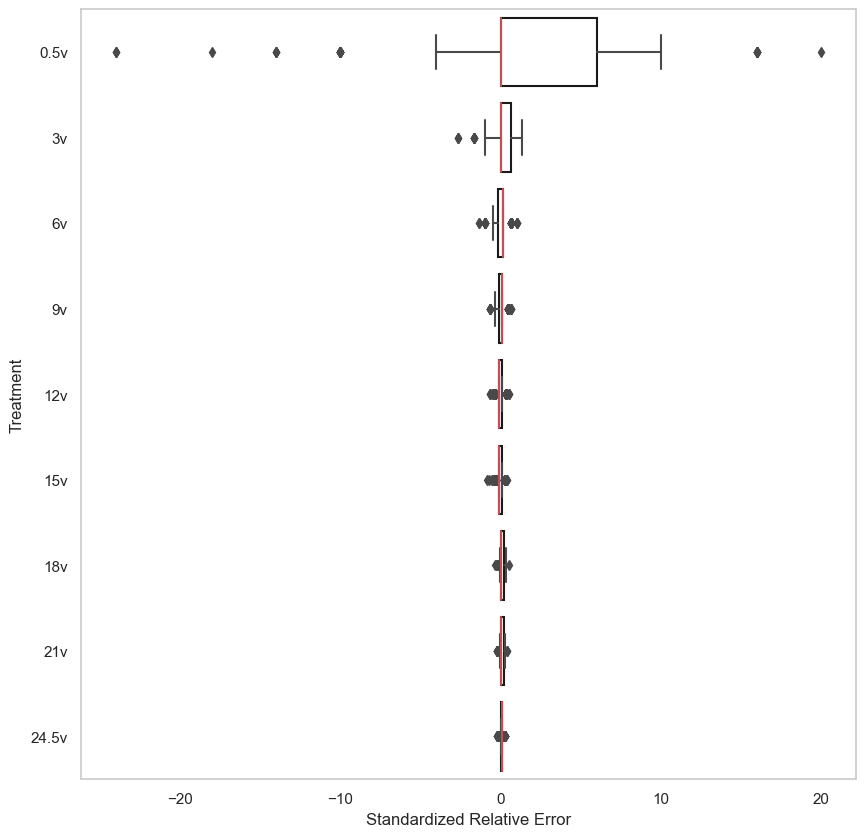

In [3]:
list_voltage = []
for i in df.columns:
    list_voltage.append(str(i))

df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=list_voltage)
df_melt.columns = ['index', 'voltage', 'value']

sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid', {'axes.grid' : False})
ax = sns.boxplot(
    x='value', 
    y='voltage', 
    data=df_melt, 
    boxprops = {"edgecolor":'k', 'facecolor':'w'},
    medianprops={"color": "r"},)
ax.set(xlabel='Standardized Relative Error', ylabel='Treatment')
plt.savefig('../docs 2nd Approach/img/Boxplot Remove Outlier STD Based from each variation sample.png')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x173c96ba588>,
 'caps': [<matplotlib.lines.Line2D at 0x173c96bab00>,
 'boxes': [<matplotlib.patches.PathPatch at 0x173c96ba438>],
 'medians': [<matplotlib.lines.Line2D at 0x173c967c588>],
 'fliers': [<matplotlib.lines.Line2D at 0x173c9a073c8>],
 'means': []}

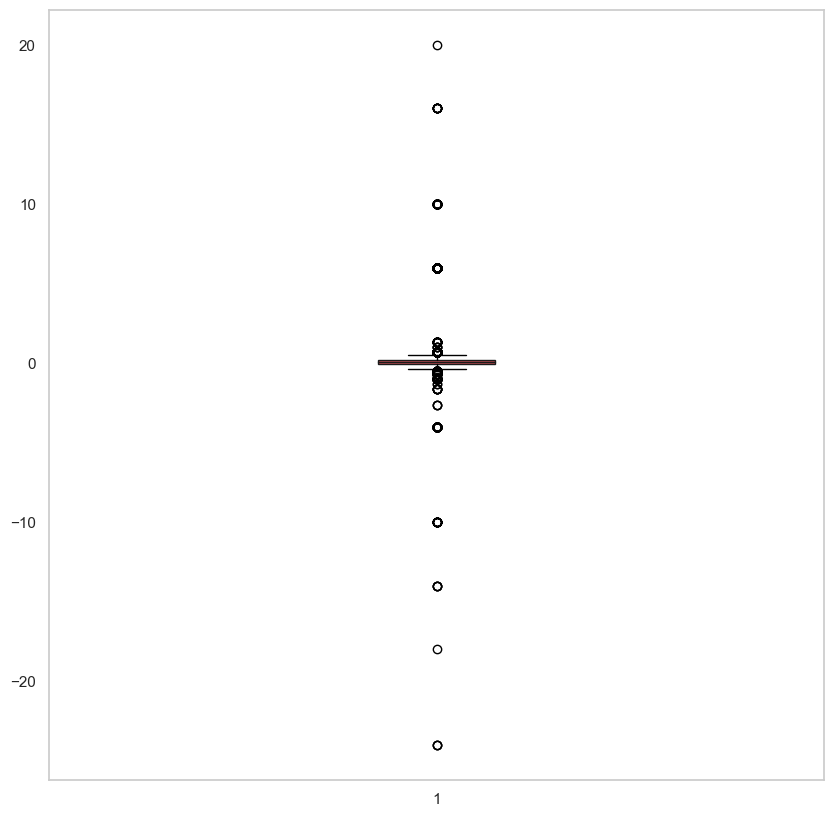

In [6]:
plt.boxplot(
    df_melt['value'],
    patch_artist=True, 
    boxprops=dict(facecolor="r", color="k"),
    medianprops=dict(color='k')
    )